In [13]:
!pip install Imputer

ERROR: Could not find a version that satisfies the requirement Imputer (from versions: none)
ERROR: No matching distribution found for Imputer


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dataset=pd.read_csv('/content/drive/My Drive/Sample4 - Iris.csv')
X=dataset.iloc[:,1:4].values
y=dataset.iloc[:,0].values

Text(0, 0.5, 'F2')

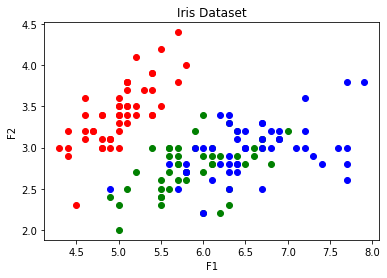

In [39]:
# create color dictionary
colors = {'setosa':'r', 'versicolor':'g', 'virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(dataset['F1'])):
    ax.scatter(dataset['F1'][i], dataset['F2'][i],color=colors[dataset['Class'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('F1')
ax.set_ylabel('F2')

No handles with labels found to put in legend.


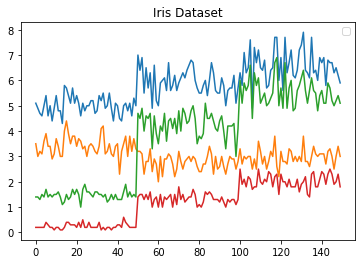

In [46]:
#line chart
# get columns to plot
columns = dataset.columns.drop(['Class'])
# create x data
x_data = range(0, dataset.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, dataset[column])
# set title and legend
ax.set_title('Iris Dataset')
ax.legend()

Text(0, 0.5, 'Frequency')

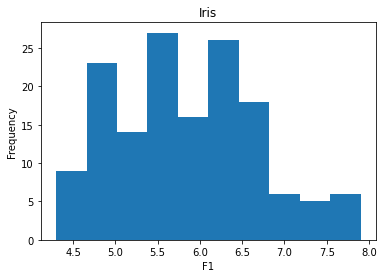

In [48]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(dataset['F1'])
# set title and labels
ax.set_title('Iris')
ax.set_xlabel('F1')
ax.set_ylabel('Frequency')

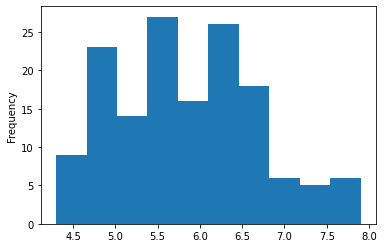

In [54]:
#pandas histogram
dataset['F1'].plot.hist()

#histogram can be only plottted with numeric data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f228c9cd550>,
      dtype=object)

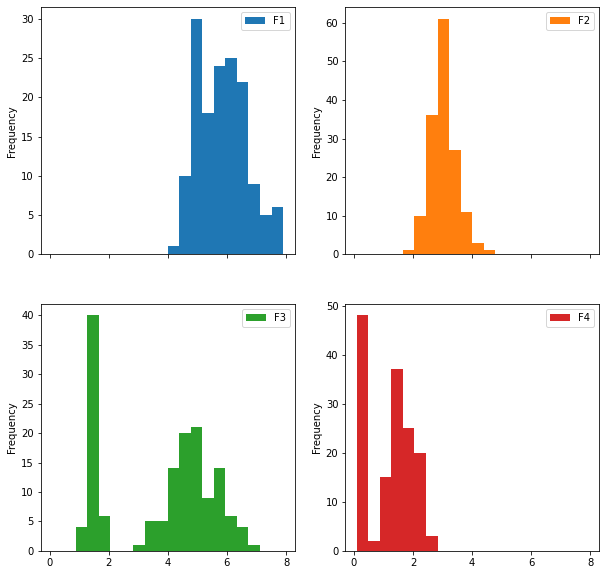

In [55]:
#plot all histograms
dataset.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

**SEABORN DATA VISUALIZATION**

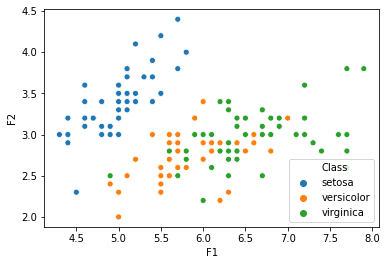

In [57]:
#scatter-plot
sns.scatterplot(x='F1', y='F2', hue='Class', data=dataset)

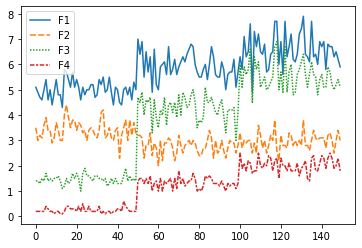

In [62]:
#line plot
sns.lineplot(data=dataset.drop(['Class'], axis=1))

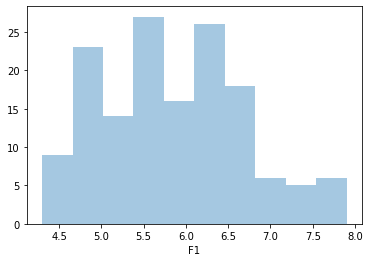

In [64]:
#histogram
sns.distplot(dataset['F1'], bins=10, kde=False)

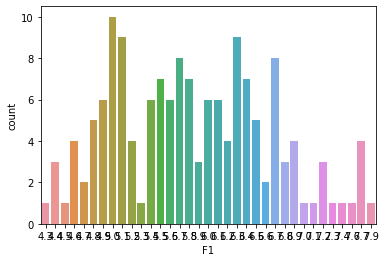

In [66]:
#bar chart
sns.countplot(dataset['F1'])

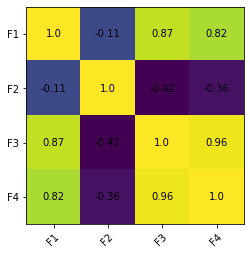

In [69]:
#heat map
#useful in showing correlation with features
# get correlation matrix
corr = dataset.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
ha="center", va="center", color="black")

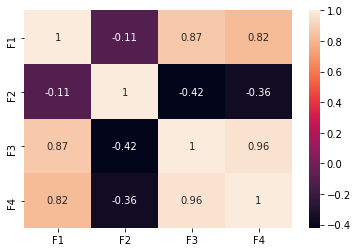

In [71]:
#by seaborn

sns.heatmap(dataset.corr(), annot=True)

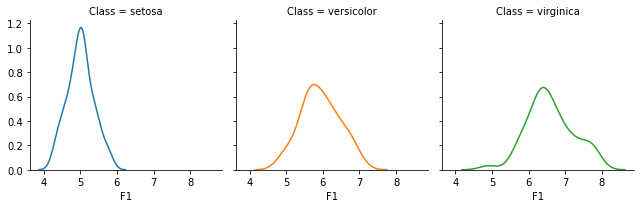

In [74]:
#faceting
#Faceting is really helpful if you want to quickly explore your dataset
g = sns.FacetGrid(dataset, col='Class',hue='Class')
g = g.map(sns.kdeplot, 'F1')

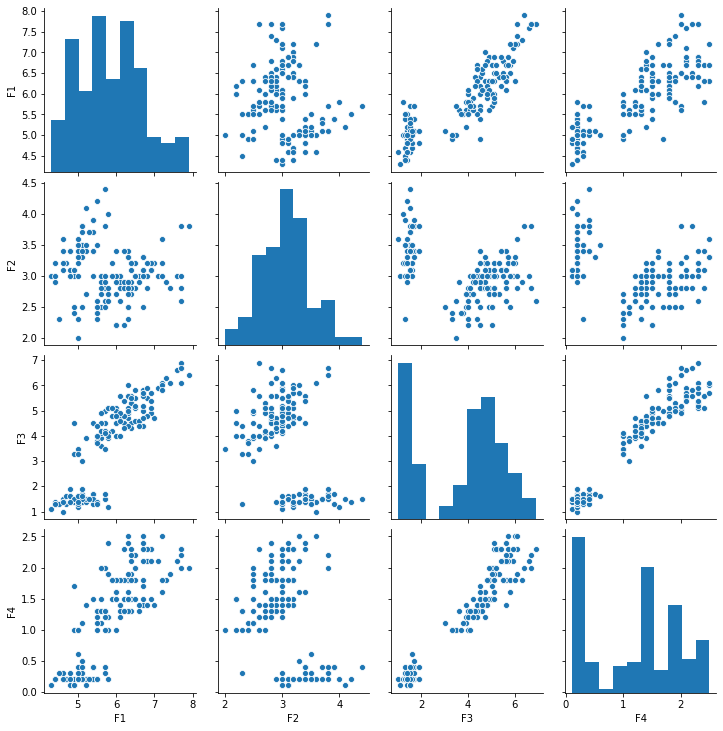

In [73]:
#pair plots
sns.pairplot(dataset)

**DATA PREPROCESSING**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax

In [77]:
dataset.isnull().any().sum()

0

In [82]:
#label encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y)
print(integer_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
#one hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [0]:
#imputer in udemy

In [0]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)